In [1]:
from utils.iterative_greedy_algorithm import IG
from utils.visualization_animation import louvain_animation
from utils.communities_network import  calc_nmi, communities_to_labels
from utils.utils import read_community_labels_file_reel 

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from concurrent.futures import ThreadPoolExecutor

In [2]:
def IG_best_beta(adj_matrix, nb_iterations=50 ):
    
    best_modularity = -1
    best_communities = None
    trace = []


    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(IG, adj_matrix, nb_iterations, p/100) for p in range(10,100,10)]
        for p,future in enumerate(futures):
            communities, modularity_trace, communities_trace, animation_frames = future.result()
            trace+=[{ "beta" : (p+1)/10, "communities": communities , "modularity": modularity_trace[-1]}]
            if modularity_trace[-1] > best_modularity:
                best_modularity = modularity_trace[-1]
                best_communities = communities
    
    return best_communities, best_modularity , trace

# Tests

In [3]:
animation_output_path = r"./output/animations"

## 1.Reel

### 1.1 Dophins

In [4]:

file_path = 'data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

62

In [5]:
best_communities, best_modularity, trace = IG_best_beta(adj_matrix, 50)

IG:   0%|          | 0/50 [00:00<?, ?it/s]

IG:   0%|          | 0/50 [00:00<?, ?it/s]

IG:   0%|          | 0/50 [00:00<?, ?it/s]

IG:   0%|          | 0/50 [00:00<?, ?it/s]

IG:   0%|          | 0/50 [00:00<?, ?it/s]

IG:   0%|          | 0/50 [00:00<?, ?it/s]

IG:   0%|          | 0/50 [00:00<?, ?it/s]

IG:   0%|          | 0/50 [00:00<?, ?it/s]

IG:   0%|          | 0/50 [00:00<?, ?it/s]

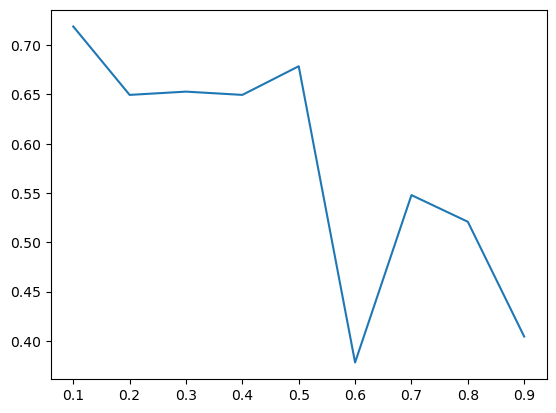

In [7]:

true_communities = read_community_labels_file_reel(
    "data/reel/dolphins/groundTruth.txt")
nmi_trace = [calc_nmi(true_communities, communities_to_labels(
    G, c["communities"])) for c in trace]

plt.plot( np.array(range(1,10))/10,  nmi_trace )